# Book-Crossing preprocess

https://github.com/tttgm/fellowshipai/blob/master/.ipynb_checkpoints/Book-Crossing-Recommender-checkpoint.ipynb
The pre-processing of the original data is built on the basis of the fellowshipai repo. 

https://github.com/tttgm/fellowshipai/blob/master/.ipynb_checkpoints/Book-Crossing-Recommender-checkpoint.ipynb

## Various files in the /books/ directory will be generated at the end

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore') # Turn off warnings
plt.style.use('seaborn-white') # Use seaborn-style plots
plt.rcParams.update({'font.size': 15}) # Set larger default plot font size
%matplotlib inline

## Import the dataset

In [2]:
# The dataset is comprised of three separate tables: BX-Users, BX-Books, and BX-Book-Ratings.
# Each is separated by semi-colons, and the first row contains the column headers.
users = pd.read_csv('orginal_book_crossing_dataset/orginal_BX-Users.csv', sep=';')
books = pd.read_csv('orginal_book_crossing_dataset/orginal_BX-Books.csv', sep=';')
book_ratings = pd.read_csv('orginal_book_crossing_dataset/orginal_BX-Book-Ratings.csv', sep=';')

In [3]:
book_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


## Preprocess1 :'users' dataframe

First, let's tidy up the column names.

In [5]:
users.columns = users.columns.str.strip().str.lower().str.replace('-', '_')
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
users.dtypes

user_id       int64
location     object
age         float64
dtype: object

In [7]:
users.loc[(users.age<5) | (users.age>100), 'age'] = np.nan

Next, can we expand the 'Location' field to break it up into 'City', 'State', and 'Country'.

In [8]:
# Note: Used Pandas Series.str.split method as it has an 'expand' parameter which can handle None cases
user_location_expanded = users.location.str.split(',', 2, expand=True)
user_location_expanded.columns = ['city', 'state', 'country']
users = users.join(user_location_expanded)

In [9]:
users.drop(columns=['location'], inplace=True)
users.head()

,user_id,age,city,state,country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


It looks like an empty 'Country' field is in the top 10 most common entries! 

In [10]:
empty_string_country = users[users.country == ''].country.count()
nan_country = users.country.isnull().sum()
print(f'There are {empty_string_country} entries with empty strings, and {nan_country} NaN entries in the Country field')

There are 4561 entries with empty strings, and 2 NaN entries in the Country field


We should probably change these empty strings to NaNs.

In [11]:
users.country.replace('', np.nan, inplace=True)

## Preprocess2 :'books' dataframe

In [12]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


First, let's tidy up the column names. And we can probably drop the image-url link columns.

In [13]:
books.columns = books.columns.str.strip().str.lower().str.replace('-', '_') # clean column names
books.drop(columns=['image_url_s', 'image_url_m', 'image_url_l'], inplace=True) # drop image-url columns
books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp Company


What about the 'type' of each field? We probably want Year of Publication to be ints or floats, and the rest to be strings ('object'). Note: The ISBN numbers may contain some letters, so we CAN'T convert them to numeric values. Will leave as strings.

In [14]:
books.dtypes

isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
dtype: object

In [15]:
# Convert years to float
books.year_of_publication = pd.to_numeric(books.year_of_publication, errors='coerce')

In [16]:
# Check for 0's or NaNs in Year of Publication
zero_yr = books[books.year_of_publication == 0].year_of_publication.count()
nan_yr = books.year_of_publication.isnull().sum()
print(f'There are {zero_yr} entries as \'0\', and {nan_yr} NaN entries in the Year of Publication field')

There are 4619 entries as '0', and 3 NaN entries in the Year of Publication field


In [17]:
# Replace all years of zero with NaN
books.year_of_publication.replace(0, np.nan, inplace=True)

Let's take a look at some of those 'outlier' books. Maybe we'll even keep them as a separate dataset so we can filter them out if we need to later in the analysis. We'll leave them in for now, and then figure out how to handle them once we have more info later on.


I think we can probably omit the 'historical_books' as they may potentially skew the model and do not seem to have much relevance to the wider userbase.

Some of the 'future' books actually appear to be errors (e.g. Alice in Wonderland, Edgar Allen Poe, etc.)... Perhaps they were supposed to be e.g. 1950 instead of 2050? However, instead of investigating this further, since there are <20 books here I will simply remove them from the 'books' table.

In [18]:
historical_books = books[books.year_of_publication<1900] # create df of old books
books_from_the_future = books[books.year_of_publication>2018] # create df of books with publication yrs in the future!

hist_books_mini = historical_books[['book_title', 'year_of_publication']]
future_books_mini = books_from_the_future[['book_title', 'year_of_publication']]
print(f'Historical books:\n{hist_books_mini}')
print('\n')
print(f'Future books:\n{future_books_mini}')

Historical books:
                                               book_title  year_of_publication
171826  Complete Works 10 Volumes [2,6,7,8,9] (Notable...               1806.0
227544                   Dalan-i bihisht (Dastan-i Irani)               1378.0
245622  Hugh Wynne, Free Quaker (2 Volumes (BCL1-PS Am...               1897.0
253767                                       Tasht-i khun               1376.0


Future books:
                                               book_title  year_of_publication
30011                                          The Royals               2020.0
37488   MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...               2030.0
55679   MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...               2030.0
78171                                    Crossing America               2030.0
80267   Alice's Adventures in Wonderland and Through t...               2050.0
92160                     Edgar Allen Poe Collected Poems               2020.0
97830       Outlin

In [19]:
print(f'Length of books dataset before removal: {len(books)}')
books = books.loc[~(books.isbn.isin(historical_books.isbn))] # remove historical books
books = books.loc[~(books.isbn.isin(books_from_the_future.isbn))] # remove historical books
print(f'Length of books dataset after removal: {len(books)}')

Length of books dataset before removal: 271379
Length of books dataset after removal: 271358


We clean up the ampersand formatting in the Publisher field.

In [20]:
books.publisher = books.publisher.str.replace('&amp', '&', regex=False)
books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton & Company


Check that there are no duplicated book entries.

In [21]:
uniq_books = books.isbn.nunique()
all_books = books.isbn.count()
print(f'No. of unique books: {uniq_books} | All book entries: {all_books}')

No. of unique books: 271358 | All book entries: 271358


We should search for empty or NaN values in authors  fields too.

In [22]:
empty_string_publisher = books[books.publisher == ''].publisher.count()
nan_publisher = books.publisher.isnull().sum()
print(f'There are {empty_string_publisher} entries with empty strings, and {nan_publisher} NaN entries in the Publisher field')

There are 0 entries with empty strings, and 2 NaN entries in the Publisher field


here are 0 entries with empty strings, and 2 NaN entries in the Publisher field
Great - no empty strings in the Publisher field, and only 2 NaNs.


In [23]:
empty_string_author = books[books.book_author == ''].book_author.count()
nan_author = books.book_author.isnull().sum()
print(f'There are {empty_string_author} entries with empty strings, and {nan_author} NaN entries in the Author field')

There are 0 entries with empty strings, and 1 NaN entries in the Author field


There are 0 entries with empty strings, and 1 NaN entries in the Author field

## Preprocess3:'book_ratings' table

Again, let's tidy up the column names.

In [24]:
book_ratings.columns = book_ratings.columns.str.strip().str.lower().str.replace('-', '_')
book_ratings.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [25]:
book_ratings.dtypes

user_id         int64
isbn           object
book_rating     int64
dtype: object

In [26]:
super_users_ = book_ratings.groupby('user_id').isbn.count().sort_values(ascending=False)
print(f'The 20 users with the most ratings:\n{super_users_[:20]}')

The 20 users with the most ratings:
user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
230522     2991
16795      2948
234623     2674
36836      2529
52584      2512
245963     2507
204864     2504
55492      2459
185233     2448
171118     2421
Name: isbn, dtype: int64


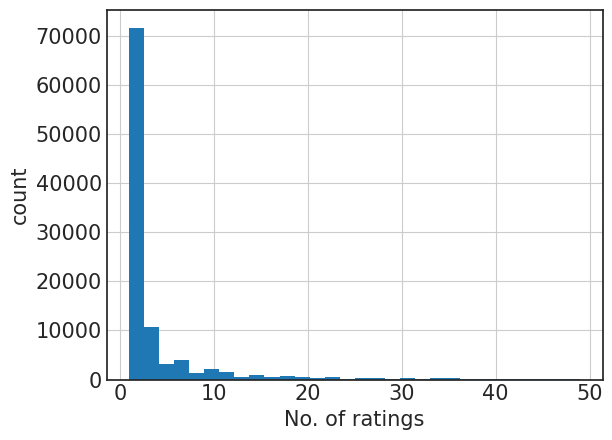

In [27]:
# user distribution - users with more than 50 ratings removed
user_hist = super_users_.where(super_users_<50)
user_hist.hist(bins=30)
plt.xlabel('No. of ratings')
plt.ylabel('count')
plt.show()


It looks like by far the most frequent events are users with only 1 or 2 rating entries. We can see that the 'super users' with thousands of ratings are significant outliers.

This becomes clear if we make the same histogram with a cutoff for users with a minimum of 1000 ratings.

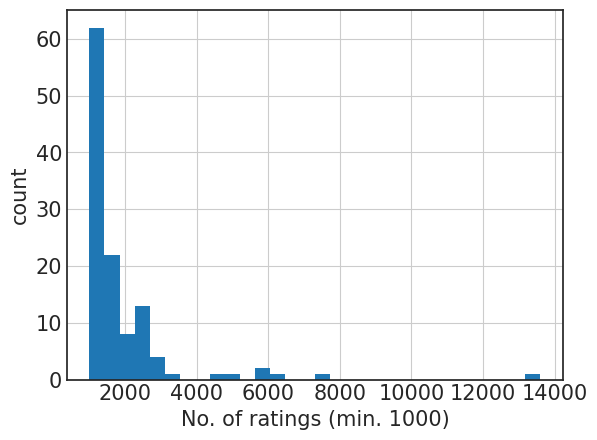

In [28]:
# only users with more than 1000 ratings
super_user_hist = super_users_.where(super_users_>1000)
super_user_hist.hist(bins=30)
plt.xlabel('No. of ratings (min. 1000)')
plt.ylabel('count')
plt.show()

For the modeling step we'll only be looking at *explicit* ratings, and so the 0 rating entry rows will be removed.

In [29]:
print(f'Size of book_ratings before removing zero ratings: {len(book_ratings)}')
book_ratings = book_ratings[book_ratings.book_rating != 0]
print(f'Size of book_ratings after removing zero ratings: {len(book_ratings)}')

Size of book_ratings before removing zero ratings: 1149780
Size of book_ratings after removing zero ratings: 433671


By removing the implicit ratings we have reduced our sample size by more than half.

##  Preprocess4: Unify the 'users', 'books', and 'book_ratings' tables

First, we'll join the 'books' table to the 'book_ratings' table on the ISBN field.

In [30]:
print(f'Books table size: {len(books)}')
print(f'Ratings table size: {len(book_ratings)}')
books_with_ratings = book_ratings.join(books.set_index('isbn'), on='isbn')
print(f'New table size: {len(books_with_ratings)}')

Books table size: 271358
Ratings table size: 433671
New table size: 433671


Let's take a look at the new table.

In [31]:
books_with_ratings.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
6,276736,3257224281,8,NaN,NaN,NaN,NaN
7,276737,0600570967,6,NaN,NaN,NaN,NaN


In [32]:
print(f'There are {books_with_ratings.book_title.isnull().sum()} books with no title/author information.')
print(f'This represents {len(books_with_ratings)/books_with_ratings.book_title.isnull().sum():.2f}% of the ratings dataset.')

There are 49851 books with no title/author information.
This represents 8.70% of the ratings dataset.


There seems to be quite a few ISBNs in the ratings table that did not match an ISBN in the books table, almost 9% of all entries!

There isn't really anything we can do about that, but we should really remove them from the dataset as we won't be able to access the title of the book to make a recommendation even if the model can use them.


In [33]:
books_with_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433671 entries, 1 to 1149779
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              433671 non-null  int64  
 1   isbn                 433671 non-null  object 
 2   book_rating          433671 non-null  int64  
 3   book_title           383820 non-null  object 
 4   book_author          383819 non-null  object 
 5   year_of_publication  378035 non-null  float64
 6   publisher            383818 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 26.5+ MB


It looks like the ```year_of_publication``` field contains the most NaN entries, while ```user_id```, ```isbn```, and ```book_rating``` are full. The ```book_title```, ```book_author```, and ```publisher``` fields contain approximately the same number of missing entries.

We'll choose to remove rows for which the ```book_title``` is empty, as this is the most crucial piece of data needed to identify the book.

In [34]:
books_with_ratings.dropna(subset=['book_title'], inplace=True) # remove rows with missing title/author data

Now I'd like to tackle the challenge of the same book potentially having multiple ISBN numbers (for the different formats it is available in). We should clean that up here before we add the 'user' table.



## Restrict books to a "single ISBN per book" (regardless of format)

Let's look again at the book titles which have the most associated ISBN numbers.

In [35]:
books_with_ratings.groupby('book_title').isbn.nunique().sort_values(ascending=False)[:10]

book_title
The Secret Garden                 18
Selected Poems                    16
Dracula                           15
Adventures of Huckleberry Finn    15
Jane Eyre                         14
Little Women                      14
Wuthering Heights                 14
Beloved                           14
Pride and Prejudice               14
The Hobbit                        12
Name: isbn, dtype: int64

In [36]:
multiple_isbns = books_with_ratings.groupby('book_title').isbn.nunique()
multiple_isbns.value_counts()

1     125328
2       7872
3       1497
4        493
5        181
6         86
7         44
8         27
9         11
10         8
14         5
15         2
11         2
16         1
12         1
18         1
Name: isbn, dtype: int64

We can see that the vast majority of books have less only 1 associated ISBN number, however quite a few multiple ISBNs. We want to create a unique_isbn such that a single book will only have 1 identifier when fed to the recommendation model.

In [37]:
has_mult_isbns = multiple_isbns.where(multiple_isbns>1)
has_mult_isbns.dropna(inplace=True) # remove NaNs, which in this case is books with a single ISBN number

In [38]:
print(f'There are {len(has_mult_isbns)} book titles with multiple ISBN numbers which we will try to re-assign to a unique identifier')

There are 10231 book titles with multiple ISBN numbers which we will try to re-assign to a unique identifier


In [39]:
# Check to see that our friend Jane Eyre still has multiple ISBN values
has_mult_isbns['Jane Eyre']

14.0

Note: Created the dictionary below and pickled it, just need to load it again (or run it if the first time on a new system).



In [40]:
# Create dictionary for books with multiple isbns
def make_isbn_dict(df):
    title_isbn_dict = {}
    for title in has_mult_isbns.index:
        isbn_series = df.loc[df.book_title==title].isbn.unique() # returns only the unique ISBNs
        title_isbn_dict[title] = isbn_series.tolist()    
        return title_isbn_dict

%time dict_unique_isbn = make_isbn_dict(books_with_ratings)

CPU times: user 34.1 ms, sys: 88 µs, total: 34.2 ms
Wall time: 33.8 ms


In [41]:
# As the loop takes a while to run (8 min on the full dataset), pickle this dict for future use
with open('multiple_isbn_dict.pickle', 'wb') as handle:
    pickle.dump(dict_unique_isbn, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [42]:
# LOAD isbn_dict back into namespace
with open('multiple_isbn_dict.pickle', 'rb') as handle:
    multiple_isbn_dict = pickle.load(handle)

In [43]:
print(f'There are now {len(multiple_isbn_dict)} books in the ISBN dictionary that have multiple ISBN numbers')

There are now 1 books in the ISBN dictionary that have multiple ISBN numbers


Note: ISBN numbers are currently 13 digits long, but used to be 10. Any ISBN that isn't 10 or 13 digits long is probably an error that should be handled somehow. Any that are 9 digits long might actually be SBN numbers (pre-1970), and can be converted into ISBN's by just pre-fixing with a zero.

In [44]:
# Add 'unique_isbn' column to 'books_with_ratings' dataframe that includes the first ISBN if multiple ISBNS,
# or just the ISBN if only 1 ISBN present anyway.
def add_unique_isbn_col(df):
    df['unique_isbn'] = df.apply(lambda row: multiple_isbn_dict[row.book_title][0] if row.book_title in multiple_isbn_dict.keys() else row.isbn, axis=1)
    return df

%time books_with_ratings = add_unique_isbn_col(books_with_ratings)

CPU times: user 5.57 s, sys: 40.9 ms, total: 5.61 s
Wall time: 5.61 s


In [45]:
books_with_ratings.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,unique_isbn
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,0155061224
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,052165615X
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,0521795028
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001.0,Doubleday,038550120X
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003.0,HarperTorch,0060517794


The table now includes our unique_isbn field.

## Join the 'users' table on the 'user_id' field

In [46]:
print(f'Books+Ratings table size: {len(books_with_ratings)}')
print(f'Users table size: {len(users)}')
books_users_ratings = books_with_ratings.join(users.set_index('user_id'), on='user_id')
print(f'New "books_users_ratings" table size: {len(books_users_ratings)}')

Books+Ratings table size: 383820
Users table size: 278858
New "books_users_ratings" table size: 383820


## Join the 'book_id'  column

In [47]:
books_map = {}

for i,item in enumerate(books.isbn):
    books_map[item] = i

In [48]:
from pandas.core.frame import DataFrame


book_id = DataFrame(books_map.items(),columns=["isbn","book_id"])

In [49]:
books_users_ratings = books_users_ratings.join(book_id.set_index('isbn'),how="inner",on='isbn')

In [50]:
books_users_ratings[300000:300010]

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,unique_isbn,age,city,state,country,book_id
432969,103102,0312271166,7,Our Lady of the Circus,David Toscana,2001.0,Thomas Dunne Books,0312271166,28.0,asheville,north carolina,usa,132335
432973,103102,0553053566,7,"Bad Girls, Good Women",Rosie Thomas,1989.0,Bantam Dell Pub Group,0553053566,28.0,asheville,north carolina,usa,76424
723254,174830,0553053566,3,"Bad Girls, Good Women",Rosie Thomas,1989.0,Bantam Dell Pub Group,0553053566,NaN,college station,texas,usa,76424
432975,103107,3423242442,6,Windgesang.,Margaret Skjelbred,2001.0,Dtv,3423242442,31.0,heidelberg,baden-wuerttemberg,germany,233870
432976,103107,3426621649,5,Der Wanderchirurg.,Wolf Serno,2002.0,"Droemersche Verlagsanstalt Th. Knaur Nachf., G...",3426621649,31.0,heidelberg,baden-wuerttemberg,germany,150141
432977,103107,3442451426,5,Die Tauschung,Charlotte Link,2002.0,Distribooks,3442451426,31.0,heidelberg,baden-wuerttemberg,germany,44652
517181,125276,3442451426,8,Die Tauschung,Charlotte Link,2002.0,Distribooks,3442451426,NaN,limbach-oberfrohna,sachsen,germany,44652
518224,125596,3442451426,7,Die Tauschung,Charlotte Link,2002.0,Distribooks,3442451426,63.0,berlin,berlin,germany,44652
541399,130271,3442451426,6,Die Tauschung,Charlotte Link,2002.0,Distribooks,3442451426,39.0,heidelberg,baden-wuerttemberg,germany,44652
644246,155691,3442451426,5,Die Tauschung,Charlotte Link,2002.0,Distribooks,3442451426,55.0,münchen,bayern,germany,44652


In [51]:
books_users_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383820 entries, 1 to 1149773
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              383820 non-null  int64  
 1   isbn                 383820 non-null  object 
 2   book_rating          383820 non-null  int64  
 3   book_title           383820 non-null  object 
 4   book_author          383819 non-null  object 
 5   year_of_publication  378035 non-null  float64
 6   publisher            383818 non-null  object 
 7   unique_isbn          383820 non-null  object 
 8   age                  268005 non-null  float64
 9   city                 383820 non-null  object 
 10  state                383820 non-null  object 
 11  country              373340 non-null  object 
 12  book_id              383820 non-null  int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 41.0+ MB


In [52]:
books_users_ratings.shape

(383820, 13)

## Preprocess 5: change to 0.5-5 scale


In [53]:
books_users_ratings['book_rating']=books_users_ratings['book_rating']/2

In [54]:
books_users_ratings.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,unique_isbn,age,city,state,country,book_id
1,276726,0155061224,2.5,Rites of Passage,Judith Rae,2001.0,Heinle,0155061224,NaN,seattle,washington,usa,225817
3,276729,052165615X,1.5,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,052165615X,16.0,rijeka,n/a,croatia,246837
4,276729,0521795028,3.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,0521795028,16.0,rijeka,n/a,croatia,246838
8,276744,038550120X,3.5,A Painted House,JOHN GRISHAM,2001.0,Doubleday,038550120X,NaN,torrance,california,usa,9295
48815,11676,038550120X,5.0,A Painted House,JOHN GRISHAM,2001.0,Doubleday,038550120X,NaN,n/a,n/a,n/a,9295


## Preprocess 6: filter

To reduce the dimensionality of the dataset and avoid running into memory error it will focus on users with at least 5 ratings.

reference:Naghiaei, M., Rahmani, H.A. and Dehghan, M., 2022. The Unfairness of Popularity Bias in Book Recommendation

In [55]:
user_ratings_threshold = 5
book_ratings_threshold = 5
filter_users = books_users_ratings['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

filter_books = books_users_ratings['isbn'].value_counts()
filter_books_list = filter_books[filter_books >= book_ratings_threshold].index.to_list()

filter_books_users_ratings = books_users_ratings[(books_users_ratings['user_id'].isin(filter_users_list))&(books_users_ratings['isbn'].isin(filter_books_list))]

print('Filter: users with at least %d ratings\and books with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold,book_ratings_threshold, len(filter_books_users_ratings)))


Filter: users with at least 5 ratingsnd books with at least 5 ratings
Number of records: 145888


In [56]:
mean1_df = filter_books_users_ratings['book_rating'].mean()
print(mean1_df)

3.8873142410616364


In [57]:
# mean2_df = filter_books_users_ratings['rating'].mean()
# print(mean2_df)

## Preparation

## Preparation

## Preparation

In [58]:
filter_users=filter_books_users_ratings[['user_id', 'age', 'country']]
filter_books=filter_books_users_ratings[['isbn', 'book_title', 'book_author', 'year_of_publication', 'book_id']]
filter_book_ratings=filter_books_users_ratings[['user_id', 'book_id', 'book_rating']]

In [59]:
filter_users=filter_users.drop_duplicates()
filter_books=filter_books.drop_duplicates()
filter_book_ratings=filter_book_ratings.drop_duplicates()

In [60]:
print('orginal ratings:\nNumber of ratings: %d\nNumber of books: %d\nNumber of users: %d' % (len(book_ratings),
                                                                                     len(filter_book_ratings['book_id'].unique()),
                                                                                     len(filter_book_ratings['user_id'].unique())))
print('\nNumber of orginal books: %d' % len(books))
print('\nNumber of orginal users: %d' % len(users))

orginal ratings:
Number of ratings: 433671
Number of books: 13768
Number of users: 12293

Number of orginal books: 271358

Number of orginal users: 278858


In [61]:
print('filtered ratings:\nNumber of ratings: %d\nNumber of books: %d\nNumber of users: %d' % (len(filter_book_ratings),
                                                                                     len(filter_book_ratings['book_id'].unique()),
                                                                                     len(filter_book_ratings['user_id'].unique())))
print('\nNumber of filtered books: %d' % len(filter_books))
print('\nNumber of filtered users: %d' % len(filter_users))

filtered ratings:
Number of ratings: 145888
Number of books: 13768
Number of users: 12293

Number of filtered books: 13768

Number of filtered users: 12293


## Skip to the end.

## Investigate the 'filter_users' dataframe

In [62]:

filter_uniq_users =filter_users.user_id.nunique()
filter_all_users = filter_users.user_id.count()
print(f'No. of unique user_id entries: {filter_uniq_users} | Total user_id entries: {filter_all_users}')

No. of unique user_id entries: 12293 | Total user_id entries: 12293


The 'User-ID' field is integers, 'Location' are strings', and the 'Age' values are floats.

We can probably change the ages to ints. Let's take a look at the values first.

Now let's have a look at the entire age range again.

In [63]:
print(sorted(filter_users.age.unique()))

[nan, 5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 90.0, 93.0, 97.0, 100.0]


Much better - now the ages go from 5 to 100, with missing values entered as NaN. Let's plot this to see how they are distributed.

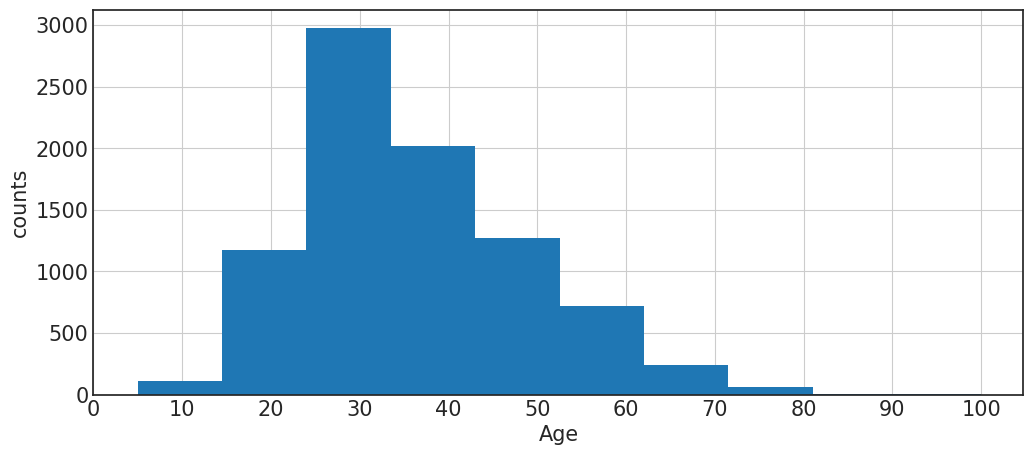

In [64]:
# First create a histogram of the Age field
filter_ax = filter_users.age.hist(bins=10, figsize=(12,5))
filter_ax.set_xlabel('Age')
filter_ax.set_ylabel('counts')
filter_ax.set_xticks(range(0,110,10))
plt.show()

Below is the same plot without any binning - i.e. each age is represented individually.

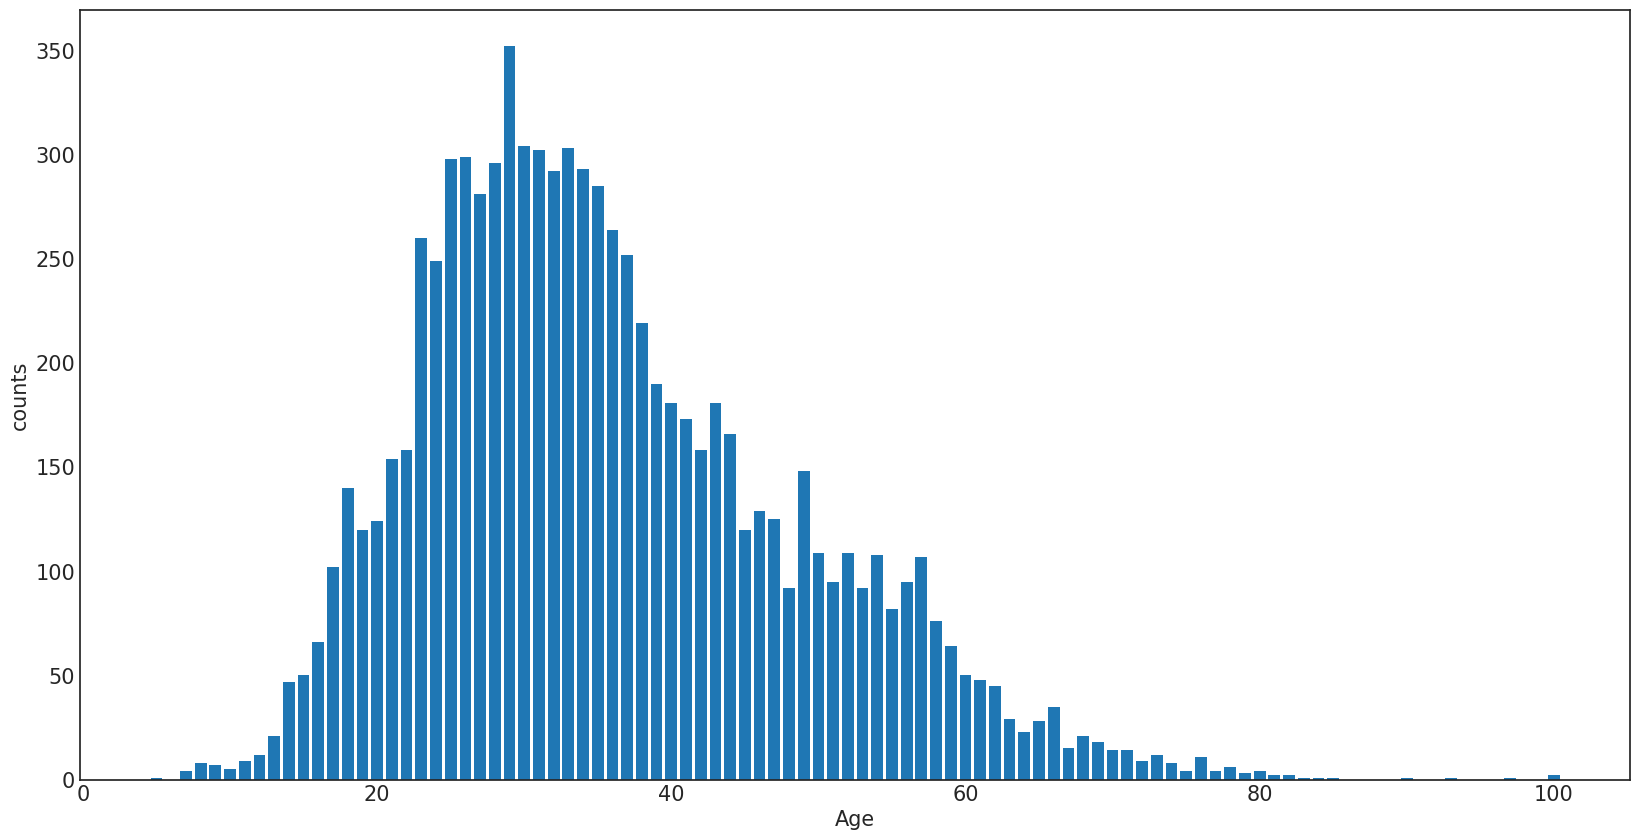

In [65]:
filter_u = filter_users.age.value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(filter_u.index, filter_u.values)
plt.xlabel('Age')
plt.ylabel('counts')
plt.show()

That is more clear to me! It seems that most of our reviewers are in their late 20s to early 30s.

How many missing Age's do we now have in the dataset?

In [66]:
filter_age_null = filter_users.age.isnull().sum() # Sums up the 1's returned by the isnull() mask
filter_all_users = filter_users.user_id.count() # Counts the number of cells in the series - excludes NaNs!
print(f'There are {filter_age_null} empty age values in our set of {filter_all_users} users (or {(filter_age_null/filter_all_users)*100:.2f}%).')

There are 3703 empty age values in our set of 12293 users (or 30.12%).


Let's take a quick look at these Location-derived fields.

In [67]:
filter_top_countries = filter_users.country.value_counts()[:10]
print(f'The 10 countries with the most users are:\n{filter_top_countries.keys()}')
print(f'The 10 countries with the most users are:\n{filter_top_countries}')

The 10 countries with the most users are:
Index([' usa', ' canada', ' germany', ' united kingdom', ' australia',
       ' spain', ' france', ' portugal', ' netherlands', ' switzerland'],
      dtype='object')
The 10 countries with the most users are:
 usa               8532
 canada            1160
 germany            432
 united kingdom     376
 australia          216
 spain              208
 france             153
 portugal            93
 netherlands         67
 switzerland         65
Name: country, dtype: int64


## Investigate the 'filter_books' dataframe

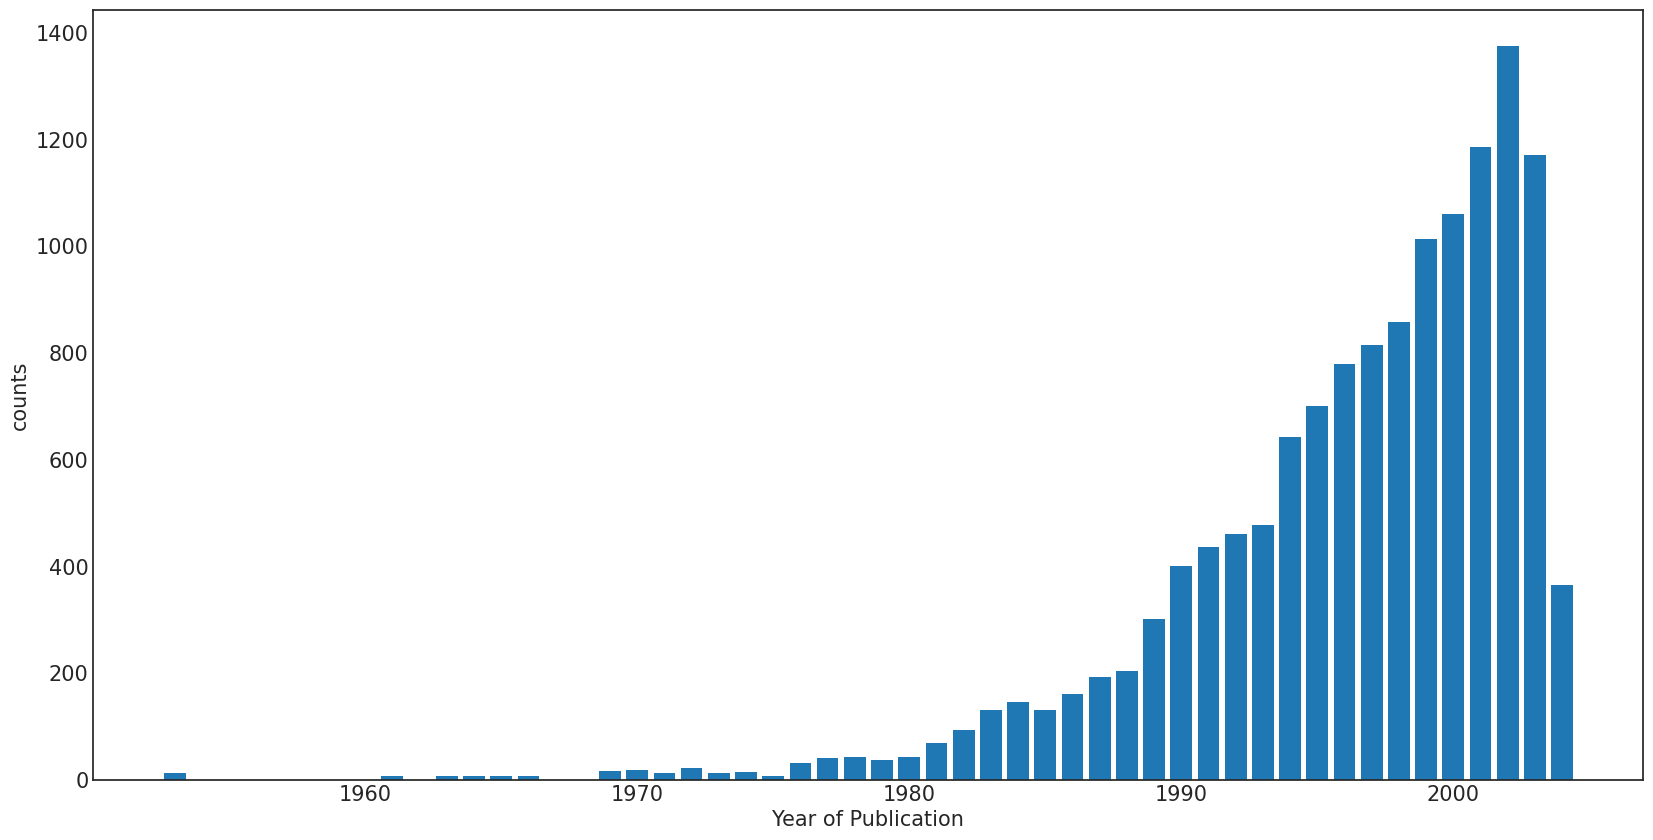

In [68]:
filter_yr = filter_books.year_of_publication.value_counts().sort_index()
filter_yr = filter_yr.where(filter_yr>5) # filter out counts less than 5
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(filter_yr.index, filter_yr.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

Note that in the plot above we filtered out counts less than 5, as there are a few books in the dataset with publication years in the 1300s, and a few in the future (?!). The plot above show the general trend that more recent books are much more frequent.


Check that there are no duplicated book entries.

In [69]:
filter_uniq_books = filter_books.book_id.nunique()
filter_all_books = filter_books.isbn.count()
print(f'No. of unique books: {filter_uniq_books} | All book entries: {filter_all_books}')

No. of unique books: 13768 | All book entries: 13768


Let's look at the most frequent Publishing houses in the dataset.

What about authors with the most entries?

In [70]:
filter_top_authors = filter_books.book_author.value_counts()[:10]
print(f'The 10 authors with the most entries in the books table are:\n{filter_top_authors}')

The 10 authors with the most entries in the books table are:
Stephen King          170
Nora Roberts          119
Danielle Steel         70
Anne McCaffrey         69
V.C. Andrews           65
Mary Higgins Clark     60
Sandra Brown           58
Piers Anthony          57
Dean R. Koontz         55
Terry Pratchett        49
Name: book_author, dtype: int64


We should search for empty or NaN values in these fields too.

In [71]:
filter_top_titles =filter_books.book_title.value_counts()[:10]
print(f'The 10 book titles with the most entries in the books table are:\n{filter_top_titles}')

The 10 book titles with the most entries in the books table are:
Pet Sematary                                                  7
The Hitchhiker's Guide to the Galaxy                          7
The Golden Compass (His Dark Materials, Book 1)               6
About a Boy                                                   6
The Hobbit                                                    5
The Fellowship of the Ring (The Lord of the Rings, Part 1)    5
The Subtle Knife (His Dark Materials, Book 2)                 5
The Gunslinger (The Dark Tower, Book 1)                       5
Lightning                                                     5
The Drawing of the Three (The Dark Tower, Book 2)             5
Name: book_title, dtype: int64


This is actually quite an important observation. Although all of the ISBN entries are *unique* in the 'books' dataframe, different *forms* of the **same** book will have different ISBNs - i.e. paperback, e-book, etc. Therefore, we can see that some books have multiple ISBN entries (e.g. Jane Eyre has 19 different ISBNs, each corresponding to a different version of the book).

Let's take a look at, for example, the entries for 'Jane Eyre'.

In [72]:
filter_books[filter_books.book_title=='Jane Eyre']

,isbn,book_title,book_author,year_of_publication,book_id
50842,0451523326,Jane Eyre,Charlotte Bronte,1988.0,9546
73314,156619024X,Jane Eyre,Charlotte Bronte,NaN,28502


It looks like each ISBN assigned to the book 'Jane Eyre' has different Publisher and Year of Publication values also.

It might be more useful for our model if we simplified this to give each book a *unique* identifier, independent of the book format, as our recommendations will be for a book, not a specific version of a book. Therefore, all values in the Jane Eyre example above would stay the same, except all of the Jane Eyre entries would additionally be assigned a *unique ISBN* code as a new field.

**Will create this more unique identifier under the field name 'unique_isbn'. Note that entries with only a single ISBN number will be left the same. However, will need to do this after joining to the other tables in the dataset, as some ISBNs in the 'book-rating' table may be removed if done prior.**

## Investigate 'filter_book_ratings' table

The data types already look good. Remember that the ISBN numbers may contain letters, and so should be left as strings.

Which users contribute the most ratings?

In [73]:
filter_super_users = filter_book_ratings.groupby('user_id').book_id.count().sort_values(ascending=False)
print(f'The 20 users with the most ratings:\n{filter_super_users[:20]}')

The 20 users with the most ratings:
user_id
11676     3098
98391      898
153662     523
16795      465
95359      396
114368     391
104636     314
235105     300
123883     297
35859      296
158295     288
204864     285
135149     266
60244      263
171118     236
257204     229
23902      222
89602      204
78973      203
7346       201
Name: book_id, dtype: int64


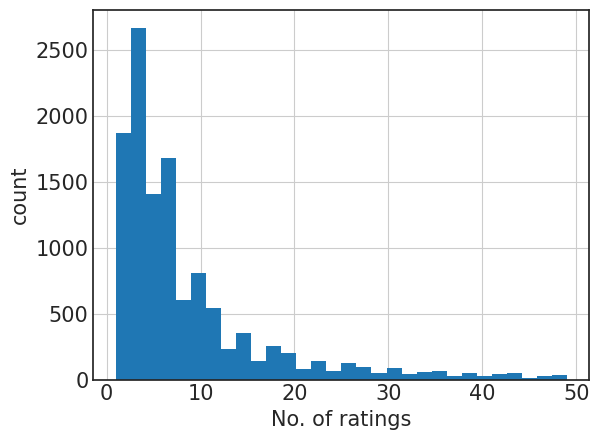

In [74]:
# user distribution - users with more than 50 ratings removed
filter_user_hist = filter_super_users.where(filter_super_users<50)
filter_user_hist.hist(bins=30)
plt.xlabel('No. of ratings')
plt.ylabel('count')
plt.show()

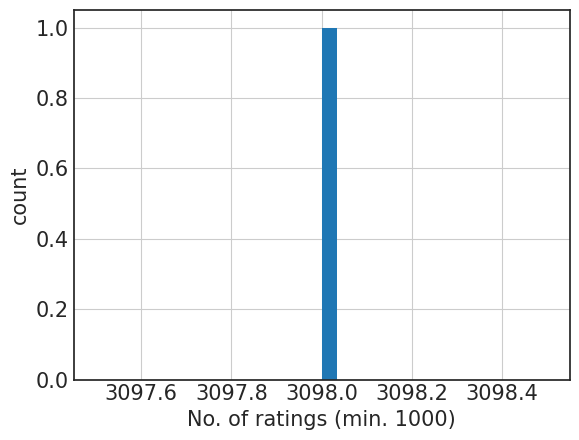

In [75]:
# only users with more than 1000 ratings
filter_super_user_hist = filter_super_users.where(filter_super_users>1000)
filter_super_user_hist.hist(bins=30)
plt.xlabel('No. of ratings (min. 1000)')
plt.ylabel('count')
plt.show()

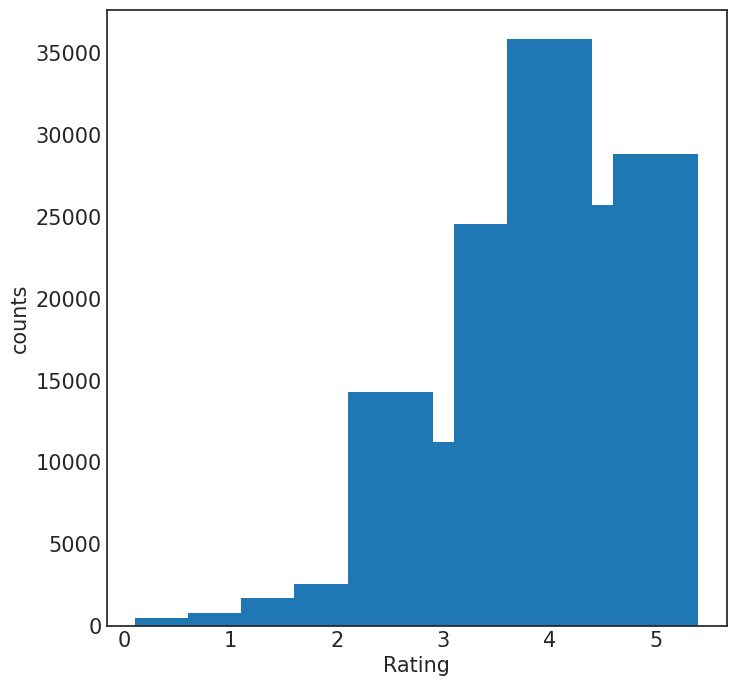

In [76]:
filter_rtg = filter_book_ratings.book_rating.value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(filter_rtg.index, filter_rtg.values)
plt.xlabel('Rating')
plt.ylabel('counts')
plt.show()

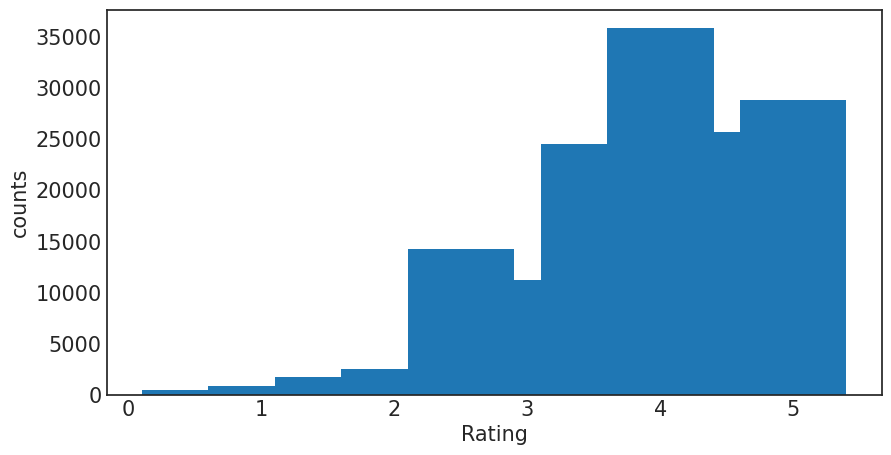

In [77]:
filter_rtg = filter_book_ratings.book_rating.value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(filter_rtg.index, filter_rtg.values)
plt.xlabel('Rating')
plt.ylabel('counts')
plt.show()

Wow! User \#11676 has almost twice as many ratings as the next highest user! All of the top 20 users have thousands of ratings, which seems like a lot, although maybe I'm just a slow reader...

Let's see how they are distributed.

It looks like **_by far_** the most frequent events are users with only 1 or 2 rating entries. We can see that the 'super users' with thousands of ratings are significant outliers.

This becomes clear if we make the same histogram with a cutoff for users with a minimum of 1000 ratings.

Let's see what the distribution of **ratings** looks like.

Seems like most of the entries have a rating of zero!

After doing some research on the internet regarding this (and similar) datasets, it appears that the rating scale is actually from 1 to 10, and a 0 indicates an 'implicit' rather than an 'explicit' rating. An implicit rating represents an interaction (may be positive or negative) between the user and the item. Implicit interactions usually need to be handled differently from explicit ones.

For the modeling step we'll only be looking at *explicit* ratings, and so the 0 rating entry rows will be removed.

In [78]:
print(filter_book_ratings)

         user_id  book_id  book_rating
48815      11676     9295          5.0
81153      16877     9295          4.5
92472      20806     9295          3.0
95333      21356     9295          3.5
98536      22625     9295          5.0
...          ...      ...          ...
851219    205783    16376          3.5
860571    208141    16376          4.5
930106    225886    16376          3.0
997315    239423    16376          5.0
1101507   264321    16376          3.0

[145888 rows x 3 columns]


In [79]:
filter_books_users_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145888 entries, 48815 to 1101507
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              145888 non-null  int64  
 1   isbn                 145888 non-null  object 
 2   book_rating          145888 non-null  float64
 3   book_title           145888 non-null  object 
 4   book_author          145888 non-null  object 
 5   year_of_publication  144590 non-null  float64
 6   publisher            145888 non-null  object 
 7   unique_isbn          145888 non-null  object 
 8   age                  104897 non-null  float64
 9   city                 145888 non-null  object 
 10  state                145888 non-null  object 
 11  country              141488 non-null  object 
 12  book_id              145888 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 15.6+ MB


In [80]:
filter_books_users_ratings.shape

(145888, 13)

# Key:Generate various files in the /books/ directory

# Key:Generate various files in the /books/ directory

# Key:Generate various files in the /books/ directory

In [81]:
filter_books.head()

,isbn,book_title,book_author,year_of_publication,book_id
48815,038550120X,A Painted House,JOHN GRISHAM,2001.0,9295
16,0060517794,Little Altars Everywhere,Rebecca Wells,2003.0,4779
19,0671537458,Waiting to Exhale,Terry McMillan,1995.0,1836
20,0679776818,Birdsong: A Novel of Love and War,Sebastian Faulks,1997.0,6276
698,0684867621,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999.0,1986


In [82]:
filter_users.head()

,user_id,age,country
48815,11676,NaN,n/a
81153,16877,37.0,usa
92472,20806,NaN,usa
95333,21356,56.0,usa
98536,22625,54.0,usa


In [83]:
filter_book_ratings

,user_id,book_id,book_rating
48815,11676,9295,5.0
81153,16877,9295,4.5
92472,20806,9295,3.0
95333,21356,9295,3.5
98536,22625,9295,5.0
...,...,...,...
851219,205783,16376,3.5
860571,208141,16376,4.5
930106,225886,16376,3.0
997315,239423,16376,5.0


In [84]:
print(dict(filter_super_users))

{11676: 3098, 98391: 898, 153662: 523, 16795: 465, 95359: 396, 114368: 391, 104636: 314, 235105: 300, 123883: 297, 35859: 296, 158295: 288, 204864: 285, 135149: 266, 60244: 263, 171118: 236, 257204: 229, 23902: 222, 89602: 204, 78973: 203, 7346: 201, 31315: 197, 248718: 196, 100906: 195, 162639: 195, 69078: 185, 13552: 178, 234828: 176, 189835: 175, 177432: 175, 76499: 172, 177458: 169, 6575: 168, 37950: 166, 46398: 162, 258534: 161, 107784: 160, 197659: 157, 110934: 156, 225087: 154, 76151: 154, 112001: 153, 265889: 153, 31826: 149, 140358: 147, 21014: 146, 185233: 145, 110973: 144, 273113: 142, 200226: 139, 69697: 135, 43246: 134, 156150: 133, 261829: 132, 105517: 131, 68555: 131, 182085: 130, 88733: 129, 114988: 129, 75591: 129, 227520: 128, 229011: 128, 190925: 128, 236283: 127, 232131: 127, 55490: 126, 25981: 126, 93047: 126, 230522: 126, 270713: 126, 87141: 125, 210485: 124, 274061: 123, 168245: 123, 235282: 121, 242083: 121, 241980: 119, 247447: 119, 76626: 119, 23872: 119, 2581

In [85]:
import json

In [86]:
class JsonEncoder(json.JSONEncoder):
    """Convert numpy classes to JSON serializable objects."""

    def default(self, obj):
        if isinstance(obj, (np.integer, np.floating, np.bool_)):
            return obj.item()
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(JsonEncoder, self).default(obj)
        
    

In [87]:
with open("../boycott_files/bcrossing_user_to_num_ratings.json","w") as file:
    json.dump(dict(filter_super_users),file,ensure_ascii=False, cls=JsonEncoder)

In [88]:
data = filter_book_ratings.groupby('book_id').book_rating.sum()

In [89]:
data = dict(data)
data = sorted(data.items(),key = lambda x:x[1],reverse = True)

In [90]:
from pandas.core.frame import DataFrame
five_percent=int(0.05*len(filter_books))

df = []
for item in data[:five_percent]:
    df.append(item[0])

df = DataFrame([df])

df.to_csv("../boycott_files/bcrossing_top_five_percent_movies.csv",header=None)

In [91]:
import numpy as np
np.set_printoptions(suppress=True)
size_percent=np.array([0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,0.999])
size=np.floor(len(filter_users)*size_percent)
print(size)
print(len(filter_users))

[    1.     6.    12.    61.   122.   614.  1229.  2458.  3687.  4917.
  6146.  7375.  8605.  9834. 11063. 12170. 12280.]
12293


In [92]:
filter_top_countries1 = filter_users.country.value_counts()[:50]
print(f'The 30 countries with the most users are:\n{filter_top_countries1.keys()}')
print(f'The 30 countries with the most users are:\n{filter_top_countries1}')

The 30 countries with the most users are:
Index([' usa', ' canada', ' germany', ' united kingdom', ' australia',
       ' spain', ' france', ' portugal', ' netherlands', ' switzerland',
       ' malaysia', ' italy', ' austria', ' new zealand', ' singapore',
       ' finland', ' romania', ' philippines', ' ireland', ' japan', ' brazil',
       ' sweden', ' belgium', ' denmark', ' china', ' england, united kingdom',
       ' israel', ' mexico', ' hong kong', ' norway', ' greece', ' iran',
       ' dominican republic', ' poland', ' kuwait', ' united states',
       ' illinois, usa', ' south africa', ' n/a', ' india', ' bulgaria', ' ,',
       ' virginia, usa', ' hungary', ' costa rica', ' bahamas',
       ' euskal herria', ' egypt', ' universe', ' florida, usa'],
      dtype='object')
The 30 countries with the most users are:
 usa                        8532
 canada                     1160
 germany                     432
 united kingdom              376
 australia                   216


In [98]:
filter_top_countries2 = books_users_ratings.groupby('country').book_id.count().sort_values(ascending=False)[:50]


print(f'The 30 countries with the most users are:\n{filter_top_countries2.keys()}')
print(f'The 30 countries with the most users are:\n{filter_top_countries2}')




The 30 countries with the most users are:
Index([' usa', ' canada', ' united kingdom', ' germany', ' spain',
       ' australia', ' n/a', ' france', ' portugal', ' malaysia',
       ' netherlands', ' switzerland', ' new zealand', ' italy', ' austria',
       ' singapore', ' philippines', ' romania', ' brazil', ' iran',
       ' ireland', ' dominican republic', ' sweden', ' belgium', ' finland',
       ' japan', ' china', ' england, united kingdom', ' norway', ' ohio, usa',
       ' mexico', ' argentina', ' poland', ' denmark', ' israel', ' hong kong',
       ' far away...', ' south africa', ' new york, georgia, usa', ' us',
       ' greece', ', portugal', ' taiwan', ' india', ' universe', ' kuwait',
       ' aruba', ' canary islands, spain', ' florida, usa', ' united state'],
      dtype='object', name='country')
The 30 countries with the most users are:
country
 usa                        261746
 canada                      35527
 united kingdom              14411
 germany            

In [99]:
filter_users.to_csv("users1.csv")
filter_books.to_csv("books.csv")
filter_book_ratings.to_csv("ratings.csv")

In [100]:
import pandas as pd
import numpy as np
df=pd.read_csv('users1.csv')

df['state']=np.nan
for i in range(len(df)):
    if df.loc[i,'country'] ==' usa':
        df.loc[i,'state']=0
    elif df.loc[i,'country']==' canada':
        df.loc[i,'state']=1    
    elif df.loc[i,'country']==' germany':
        df.loc[i,'state']=2
    elif df.loc[i,'country']==' united kingdom':
        df.loc[i,'state']=3
    elif df.loc[i,'country']== ' australia':
        df.loc[i,'state']=4
    elif df.loc[i,'country']==' spain':
        df.loc[i,'state']=5
    elif df.loc[i,'country']==' france':
        df.loc[i,'state']=6
    elif df.loc[i,'country']==' portugal':
        df.loc[i,'state']=7
    elif df.loc[i,'country']==' netherlands':
        df.loc[i,'state']=8    
    elif df.loc[i,'country']==' switzerland':
        df.loc[i,'state']=9
    elif df.loc[i,'country']==' malaysia':
        df.loc[i,'state']=10
    elif df.loc[i,'country']==' italy':
        df.loc[i,'state']=11
    elif df.loc[i,'country']==' austria':
        df.loc[i,'state']=12
    elif df.loc[i,'country']==' new zealand':
        df.loc[i,'state']=13
    elif df.loc[i,'country']==' singapore':
        df.loc[i,'state']=14  
    elif df.loc[i,'country']==' finland':
        df.loc[i,'state']=15
    elif df.loc[i,'country']== ' romania':
        df.loc[i,'state']=16
    elif df.loc[i,'country']==' philippines':
        df.loc[i,'state']=17
    elif df.loc[i,'country']==' ireland':
        df.loc[i,'state']=18
    elif df.loc[i,'country']==' japan':
        df.loc[i,'state']=19   
df['state'] = df['state'].astype('Int64')
df.to_csv('users.csv',index=0)


In [101]:
df[1000:1200]

,Unnamed: 0,user_id,age,country,state
1000,346882,82893,40.0,usa,0
1001,349008,83443,NaN,NaN,<NA>
1002,354372,85502,NaN,usa,0
1003,357275,86123,NaN,canada,1
1004,357666,86189,NaN,usa,0
...,...,...,...,...,...
1195,26626,6280,46.0,spain,5
1196,1082855,259057,15.0,spain,5
1197,514643,124888,25.0,spain,5
1198,741671,179624,31.0,spain,5


In [102]:
#Missing values for age

empty_string_country1 = df[df.country == ''].country.count()
nan_country1 = df.country.isnull().sum()
print(f'There are {empty_string_country1} entries with empty strings, and {nan_country1} NaN entries in the Country field')

print((empty_string_country1+nan_country1)/df.user_id.count())

There are 0 entries with empty strings, and 476 NaN entries in the Country field
0.03872122346050598


In [103]:
#Missing values for age
empty_string_age = df[df.age == ''].age.count()
nan_age = df.age.isnull().sum()
print(f'There are {empty_string_age} entries with empty strings, and {nan_age} NaN entries in the Country field')
print((empty_string_age+nan_age)/df.user_id.count())

There are 0 entries with empty strings, and 3703 NaN entries in the Country field
0.3012283413324656


In [104]:
# prepare for viz_constants.py

num_users = filter_users.user_id.count()
num_ratings =filter_book_ratings.book_rating.count()
num_items=filter_books.book_id.count()
num_hits =filter_books_users_ratings[(filter_books_users_ratings['book_rating']>=4.0)].book_rating.count()
print(num_users)
print(num_items)
print(num_ratings)
print(num_hits)

12293
13768
145888
90421


# References

1. http://blog.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/
2. https://cambridgespark.com/content/tutorials/implementing-your-own-recommender-systems-in-Python/index.html
3. https://towardsdatascience.com/building-a-recommendation-system-for-fragrance-5b00de3829da